MechStiff tutorial
----------------

This is an example how to use Mechanical Stiffness Calculations implemented in ProDy package.

The theory of MechStiff has been describe in:

Eyal E, Bahar I (2008) Toward a molecular understanding of the anisotropic response of proteins to external forces: insights from elastic network models Biophys J 94: 3424-35. PMID: 18223005; PMC2292382

http://www.ncbi.nlm.nih.gov/pubmed/18223005?ordinalpos=5&itool=EntrezSystem2.PEntrez.Pubmed.Pubmed_ResultsPanel.Pubmed_RVDocSum

In [1]:
%matplotlib inline
from prody import *
import matplotlib.pylab as plt

In [2]:
gfp, header = parsePDB('1gfl', header=True)

@> PDB file is found in working directory (1gfl.pdb.gz).
@> 3950 atoms and 1 coordinate set(s) were parsed in 0.05s.


In [3]:
gfp

<AtomGroup: 1gfl (3950 atoms)>

In [4]:
gfp.getHierView()

<HierView: AtomGroup 1gfl (2 chains, 760 residues)>

In [5]:
calphas = gfp.select('protein and chain A and name CA')

In [6]:
calphas

<Selection: 'protein and chain A and name CA' from 1gfl (230 atoms)>

Building Hessian using ANM model
-----------------


We instantiate an ANM instance and we are building Hessian matrix by passing selected atoms.

In [7]:
anm = ANM('GFP ANM analysis')

In [8]:
anm.buildHessian(calphas, cutoff=13.0)
anm.calcModes(n_modes='all')

@> Hessian was built in 0.10s.
@> 684 modes were calculated in 0.10s.


In [9]:
anm.getHessian().round(3)

array([[ 9.017,  2.741, -0.979, ...,  0.   ,  0.   ,  0.   ],
       [ 2.741,  5.32 ,  1.181, ...,  0.   ,  0.   ,  0.   ],
       [-0.979,  1.181,  5.663, ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [ 0.   ,  0.   ,  0.   , ...,  4.794, -0.052, -3.557],
       [ 0.   ,  0.   ,  0.   , ..., -0.052,  3.885,  1.827],
       [ 0.   ,  0.   ,  0.   , ..., -3.557,  1.827,  7.321]])

Mechanical Stiffness Matrix Calculations
--------------------------------------

We can perfom MechStiff calculations for selected group of 230 Ca's atoms.

In [10]:
stiffness = calcMechStiff(anm, calphas)

@> Calculating stiffness matrix.
@> Stiffness matrix calculated in 0.24s.
@> The range of effective force constant is: 5.27141824578 to 17.3849094465.


In [11]:
stiffness.round(3)

array([[ 0.   ,  8.547,  8.551, ...,  8.733,  8.365,  7.427],
       [ 8.547,  0.   ,  8.9  , ...,  8.981,  8.618,  7.773],
       [ 8.551,  8.9  ,  0.   , ...,  8.879,  8.557,  7.845],
       ..., 
       [ 8.733,  8.981,  8.879, ...,  0.   ,  8.877,  8.366],
       [ 8.365,  8.618,  8.557, ...,  8.877,  0.   ,  9.53 ],
       [ 7.427,  7.773,  7.845, ...,  8.366,  9.53 ,  0.   ]])

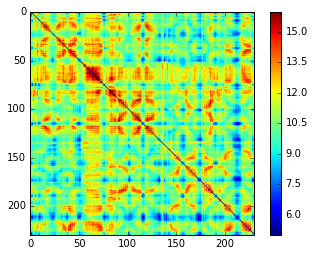

In [12]:
plt.imshow(stiffness, cmap=plt.cm.jet)
plt.colorbar()
plt.clim([5,16])

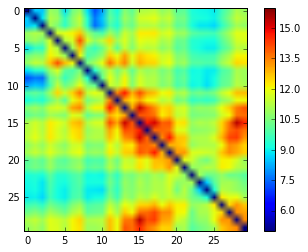

In [13]:
plt.imshow(stiffness[0:30, 0:30], cmap=plt.cm.jet)
plt.colorbar()
plt.clim([5,16])

To obtain matrix with effective spring constant values use:

(<matplotlib.image.AxesImage at 0x7f37960d0710>,
 [],
 [])

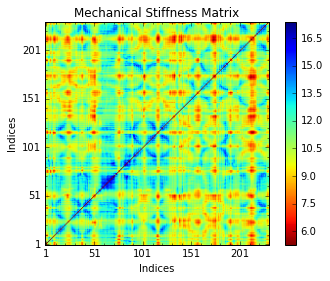

In [14]:
showMechStiff(stiffness, calphas)

Mean value of spring constant is also significant and it can be obtain by using showMeanMechStiff() function. Arrows and trianglars represents beta strands and helixes. This information can be also seen on the 3D structure of protein using writeDeformProfile().

@> The range of mean effective force constant is: 8.48582065351 to 12.5870266927.


<function matplotlib.pyplot.show>

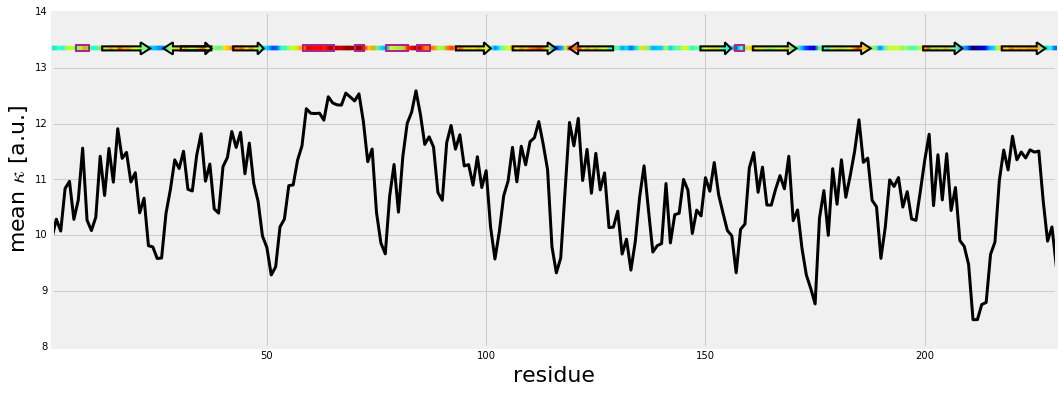

In [15]:
showMeanMechStiff(stiffness, calphas, header, 'A')

Mechanical Stiffness in VMD
---------------------------

Mechanical Stiffness results can be seen in VMD program using:

- writeVMDstiffness() - shows pair of residues with selected range of spring constant
- writeDeformProfile() - deformability profile will be loaded to VMD program

In [16]:
pdb = gfp.select('chain A') # all-atom structure

In [17]:
residue_range = [3,7] # residues with index 3 to 7.
k_range = [0,7.5] # effective spring constant 0-7.5
writeVMDstiffness(stiffness, pdb, residue_range, k_range)

@> Creating VMD file.


<closed file 'vmd_out.tcl', mode 'w' at 0x7f379da8cf60>

In [18]:
singe_residue = [3]
k_range = [0,7]
writeVMDstiffness(stiffness, pdb, singe_residue, k_range, loadToVMD=False)

@> Creating VMD file.


<closed file 'vmd_out.tcl', mode 'w' at 0x7f3796183540>

In [19]:
calcStiffnessRange(stiffness)

(5.2714182457813044, 17.384909446532447)

In [20]:
writeDeformProfile(stiffness, pdb, select='chain A and name CA', pdb_selstr='protein')

@> PDB file with deformability profile has been saved.
@> Creating TCL file.


Calculate Distribution of Deformation
--------------------------------

Distribution of the deformations in the distance d contributed by each mode k in the presence of extensional forces applied to residues i and j. In this example it will be between residue nr 3 and 132.

@> Deformation was calculated in 0.67s.


<function matplotlib.pyplot.show>

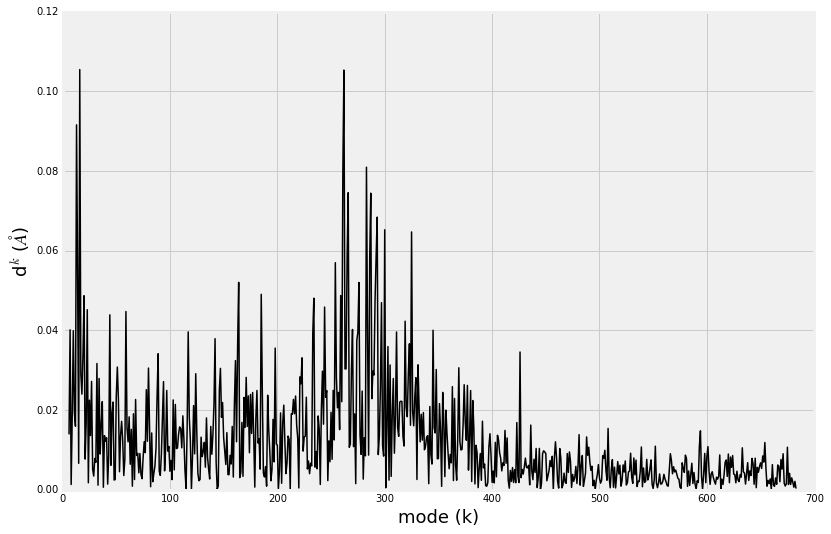

In [21]:
showPairDeformationDist(anm, calphas, 3, 132)

How to put multiple results on one plot
-------------------------------

The results can be used directly from the function. Below the example how to show to results on one plot.

In [22]:
import matplotlib
import matplotlib.pylab as plt

In [23]:
D1 = calcPairDeformationDist(anm, calphas, 132, 212)

@> Deformation was calculated in 0.66s.


In [24]:
D2 = calcPairDeformationDist(anm, calphas, 182, 212)

@> Deformation was calculated in 0.66s.


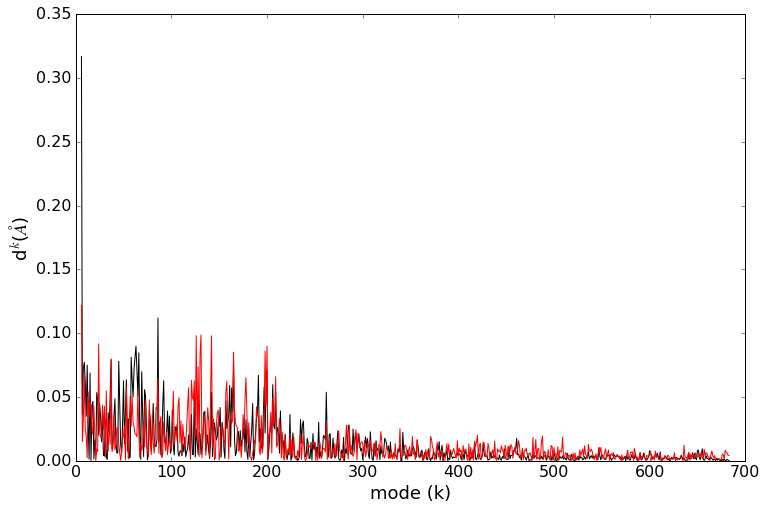

In [25]:
matplotlib.rcParams['font.size'] = '16'
fig = plt.figure(num=None, figsize=(12,8), facecolor='w')
plt.plot(D1[0], D1[1], 'k-', D2[0], D2[1], 'r-')
plt.xlabel('mode (k)', fontsize = '18')
plt.ylabel('d$^k$' '($\AA$)', fontsize = '18')
plt.show()